# **Clustering Service numérique établissement**


Nous allons encore une fois procéder à un clustering pour réduire le nombre de colonnes suivantes en une seule colonne avec plusieurs modalités :
- *`'ServInt_NoteElev'`* : Les notes des élèves sont l'un des services de l'établissement accessibles hors établissement via internet
- *`'ServInt_AbsElev'`* : Les absences des élèves sont l'un des services de l'établissement accessibles hors établissement via internet
- *`'ServInt_EdtElevCls'`* : L'emploi du temps des élèves ou de la classe est l'un des services de l'établissement accessible hors
établissement via internet
- *`'ServInt_CahierTxt'`* : Le cahier de textes de la classe est l'un des services de l'établissement accessibles hors établissement
via internet
- *`'ServInt_DocRessPeda'`* : Les documents et ressources pédagogiques sont l'un des services de l'établissement accessibles hors établissement via internet
- *`'ServInt_AgdActuEtab'`* : L'agenda/Actualités de l'école est un service disponible par internet pour l'école
- *`'ServInt_PlatApp'`* : La plateforme d'apprentissage (Moodle, Claroline, MOOC, etc.) est l'un des services de l'établissement
accessible hors établissement via internet
- *`'ServInt_Autres'`* : D'autres services de l'établissement sont accessibles hors établissement via internet
- *`'ServInt_aucun'`* : Aucun service n'est proposé par l'école



Nous faisons comme nous avons pu le faire pour les analyses précédentes. Nous traitons ces colonnes ensemble car elles sont toutes liées car elles traitent des services que proposent un établissement au format numérique. Des informations qu'on peut accéder depuis Internet

### *Import des bibliothèques*

In [2]:
import pandas as pd
import prince as pc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly_express as px
import plotly.graph_objects as go

# import image module
from IPython.display import Image
import kaleido
import io
from PIL import Image as ImagePIL

### *Import des données*

In [3]:
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';')

#on garde les données les plus récentes, donc 2019
df = df.loc[df["Millesime"] == 2019]

#On consulte les colonnes existantes
df.columns

Index(['Code_UAI', 'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj',

### *Traitement des données*

On va changer d'index en affectant le code UAI car il est unique et il sera plus simple d'identifier les établissements par la suite. On va supprimer toutes les colonnes qui nous intéressenet pas et on va supprimer les lignes contenant des NaN

In [4]:
df_services = df.set_index("Code_UAI")

#On supprime les colonnes inutiles
df_services.drop(columns=['Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
       'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet', 'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=True)

#On supprime les lignes avec des valeurs manquantes
df_services.dropna(inplace=True)

On vérifie que les données indésirables ont bien été supprimées

In [5]:
df_services.head(3)

,ServInt_NoteElev,ServInt_AbsElev,ServInt_EdtElevCls,ServInt_CahierTxt,ServInt_DocRessPeda,ServInt_AgdActuEtab,ServInt_PlatApp,ServInt_Autres,ServInt_aucun
Code_UAI,,,,,,,,,
0810016C,oui,oui,oui,oui,oui,oui,non,oui,non
0810026N,oui,oui,oui,oui,oui,oui,non,non,non
0810041E,oui,oui,oui,oui,oui,oui,non,oui,non


In [6]:
for column in df_services.columns:
    print("Nombre de valeurs manquantes dans la colonne ", column, ":", df_services[column].isna().sum())

Nombre de valeurs manquantes dans la colonne  ServInt_NoteElev : 0
Nombre de valeurs manquantes dans la colonne  ServInt_AbsElev : 0
Nombre de valeurs manquantes dans la colonne  ServInt_EdtElevCls : 0
Nombre de valeurs manquantes dans la colonne  ServInt_CahierTxt : 0
Nombre de valeurs manquantes dans la colonne  ServInt_DocRessPeda : 0
Nombre de valeurs manquantes dans la colonne  ServInt_AgdActuEtab : 0
Nombre de valeurs manquantes dans la colonne  ServInt_PlatApp : 0
Nombre de valeurs manquantes dans la colonne  ServInt_Autres : 0
Nombre de valeurs manquantes dans la colonne  ServInt_aucun : 0


On va ensuite renommer les colonnes comme le suffixe `ServInt` se répète

In [7]:
old_columns = df_services.columns

for column in old_columns:
    df_services.rename(columns={column: column.replace("ServInt_", "").lower()}, inplace=True)

df_services.columns

Index(['noteelev', 'abselev', 'edtelevcls', 'cahiertxt', 'docresspeda',
       'agdactuetab', 'platapp', 'autres', 'aucun'],
      dtype='object')

On va maintenant transfomer les "oui" et "non" en valeurs binaires pour pouvoir faire une classification non supervisée. On va transformer les "oui" en 1 et les "non" en 0

In [8]:
for column in df_services.columns:
    df_services[column] = df_services[column].replace({'oui': 1, 'non': 0})
    df_services[column] = df_services[column].astype('float64')

df_services.head(3)

,noteelev,abselev,edtelevcls,cahiertxt,docresspeda,agdactuetab,platapp,autres,aucun
Code_UAI,,,,,,,,,
0810016C,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
0810026N,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
0810041E,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


### Corrélation

On va d'abord voir si une corrélation existe entre ces différentes variables.

In [9]:
columns_names = df_services.columns

heat = go.Heatmap(
    z = df_services.corr(),
    x = columns_names,
    y = columns_names,
    xgap=1,
    ygap=1,
    colorbar_thickness=20,
    colorbar_ticklen=3,
    hovertext= df_services.corr(),
    hoverinfo='text'
)

layout = go.Layout(
    title='Matrice de corrélation',
    width=600,
    height=600,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig = go.Figure(data=[heat], layout=layout)
Image(fig.to_image(format="png", engine="kaleido", width=600, height=600))
fig.show()

On peut remarquer une petite corrélation entre le "cahiertxt" et "noteelev", ce qui n'est pas trés surprenant car la plupart des établissements qui offrent la possibilité de consulter son cahier de texte en ligne (par exemple ENT) offre aussi la possibilité d'accéder aux notes de l'élève.

### *Clustering*

On peut maintenant faire du clustering avec l'algorithme de KMeans en essayant plusieurs paramètres pour l'algo. Nous allons laisser seulement les résultats avec les meilleurs paramètres. Nos essais précédents n'apparaîtront pas car ils sont multiples et n'aboutissent pas toujours à des résultats de qualité.

In [10]:
km_services = KMeans(
    n_clusters=3, 
    random_state=42,
    n_init=20,
    max_iter=3600,
    init='k-means++'
)

y_km_services = km_services.fit_predict(df_services)

resultat = pd.DataFrame(km_services.cluster_centers_, columns=km_services.feature_names_in_)

resultat

,noteelev,abselev,edtelevcls,cahiertxt,docresspeda,agdactuetab,platapp,autres,aucun
0,1.000000,0.989899,0.979798,1.0,0.989899,0.959596,1.000000e+00,5.858586e-01,0.0
1,0.994444,0.961111,0.994444,1.0,0.977778,0.983333,-8.326673e-17,-1.110223e-16,0.0
2,0.993789,0.944099,1.000000,1.0,0.993789,0.993789,5.551115e-17,1.000000e+00,0.0


On va convertir en "oui" et "non" pour que ces résultats soient plus parlant. Nous allons essayer d'interprèter ces centres pour pouvoir comprendre le nombre de classes et les caractèristiques moyennes d'une classe pour pouvoir lui accorder une modalité

In [11]:
def change_value(row):
    if(row > 0.5):
        return 1
    else:
        return 0


for column in resultat.columns:
    resultat[column] = resultat[column].apply(change_value)
    resultat[column] = resultat[column].replace({1: 'oui', 0: 'non'})
    resultat[column] = resultat[column].astype(str)


resultat

,noteelev,abselev,edtelevcls,cahiertxt,docresspeda,agdactuetab,platapp,autres,aucun
0,oui,oui,oui,oui,oui,oui,oui,oui,non
1,oui,oui,oui,oui,oui,oui,non,non,non
2,oui,oui,oui,oui,oui,oui,non,oui,non


Après plusieurs essais avec plusieurs nombre de clusters, nous avons vu qu'avec un faible nombre de clusters (comme 2,3 ou 4) les clusters se ressemblaient quand même et il n'y avait pas de grandes différences pour les moyennes. Nous avons donc essayé d'augmenter le nombre de clusters, mais sans pas trop de résulats car les clusters étaient quasiment identiques pour ce qui est des moyennes des centres. Quand on crée un grand nombre de clusters, il existe souvent un ou deux classes qui sont bien différentes de toutes les autres, mais le seul inconvénient est que ces classes ne contiennent que peu d'établissement (en général 4 sur un totale de 912, des établissements atypiques). Nous avons donc décidé de créer seulement 3 clusters en remarquant qu'il y en a 2 qui se ressemblent. Nous avons donc décidé de rassembler la classe 1 et 2 en une seule classe. 

On va accorder les modalités suivantes à chaque classe :
- "Trés bien" : la classe 0
- "Bien" : les classes 1 et 2

In [12]:
df_services['cluster'] = y_km_services

df_services.cluster = df_services.cluster.astype(str)


df_services.cluster.value_counts()
df_services.head(3)

,noteelev,abselev,edtelevcls,cahiertxt,docresspeda,agdactuetab,platapp,autres,aucun,cluster
Code_UAI,,,,,,,,,,
0810016C,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2
0810026N,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
0810041E,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2


On peut maintenant passer à l'ACP pour voir les résultats. 

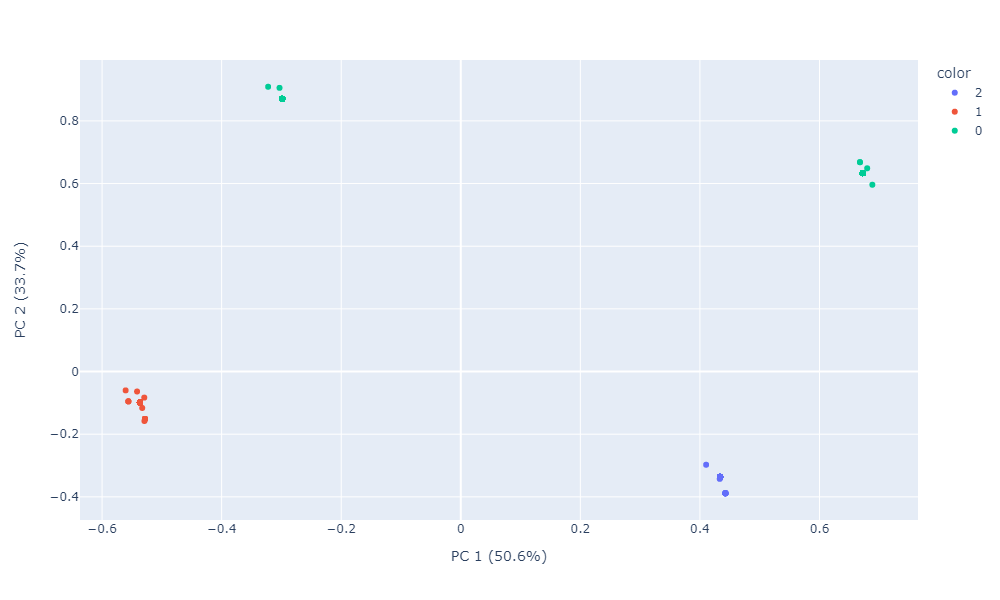

In [13]:
pca_services = PCA(n_components=2)

components_services = pca_services.fit_transform(df_services.drop('cluster', axis=1))

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_services.explained_variance_ratio_ * 100)
}

fig = px.scatter(components_services, x=0, y=1, color=df_services.cluster, labels=labels)

Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()

L'ACP met en évidence l'existence de 4 groupes. Nous avons une très bonne variance expliquée qui est de 82.3% ici. Il vaut mieux donc refaire une classification en cherchant 4 clusters. Nous allons recommencer le processus de classification une deuxième fois ci-dessous.

In [14]:
km_services_2 = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=20,
    max_iter=3600,
    init='k-means++'
)

y_km_services_2 = km_services_2.fit_predict(df_services.drop('cluster', axis=1))

resultat_2 = pd.DataFrame(km_services_2.cluster_centers_, columns=km_services_2.feature_names_in_)

resultat_2

,noteelev,abselev,edtelevcls,cahiertxt,docresspeda,agdactuetab,platapp,autres,aucun
0,0.994444,0.961111,0.994444,1.0,0.977778,0.983333,-8.326673e-17,-1.110223e-16,0.0
1,0.993789,0.944099,1.000000,1.0,0.993789,0.993789,5.551115e-17,1.000000e+00,0.0
2,1.000000,0.982759,0.965517,1.0,1.000000,0.965517,1.000000e+00,1.000000e+00,0.0
3,1.000000,1.000000,1.000000,1.0,0.975610,0.951220,1.000000e+00,-1.665335e-16,0.0


In [15]:
for column in resultat_2.columns:
    resultat_2[column] = resultat_2[column].apply(change_value)
    resultat_2[column] = resultat_2[column].replace({1: 'oui', 0: 'non'})
    resultat_2[column] = resultat_2[column].astype(str)
    
resultat_2

,noteelev,abselev,edtelevcls,cahiertxt,docresspeda,agdactuetab,platapp,autres,aucun
0,oui,oui,oui,oui,oui,oui,non,non,non
1,oui,oui,oui,oui,oui,oui,non,oui,non
2,oui,oui,oui,oui,oui,oui,oui,oui,non
3,oui,oui,oui,oui,oui,oui,oui,non,non


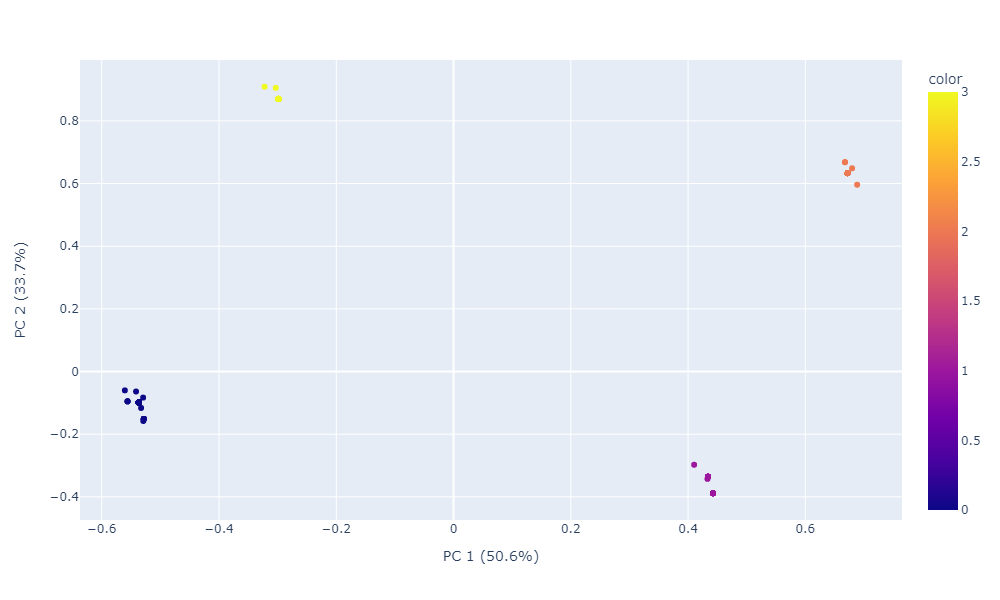

In [16]:
pca_services_2 = PCA(n_components=2)
components_services_2 = pca_services_2.fit_transform(df_services.drop('cluster', axis=1))

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_services_2.explained_variance_ratio_ * 100)
}

fig = px.scatter(components_services_2, x=0, y=1, color=y_km_services_2, labels=labels)
Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()

Nous voyons ici que c'est mieux que la découpe précédente, on a donc une meilleure classification. Le seul inconvénient est que nous ne pouvons pas réellement accordé à chaque groupe une modalité car les clusters se ressemblent beaucoup. Nous allons donc garder les modalités et valeurs fixés précedemment.

In [17]:
df_services.cluster.replace({'0' : "Trés bien", "1": "Bien", "2": "Bien"}, inplace=True)

df_services.cluster.value_counts()

Bien         341
Trés bien     99
Name: cluster, dtype: int64

### *Enregistrement du résultat*

On peut maintenant enregistrer le résultat dans un fichier csv qui va être utilisé pour l'analyse finale.

In [18]:
df_services_final = pd.DataFrame(df_services.cluster)
df_services_final.rename(columns={'cluster': 'services_num'}, inplace=True)

df_services_final.head(3)

,services_num
Code_UAI,
0810016C,Bien
0810026N,Bien
0810041E,Bien


In [19]:
df_services_final.to_csv('../data/analyses/services_num.csv', index=True, sep=";")